In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
plt.style.use('seaborn')

In [3]:
dfx = pd.read_csv('xdata.csv')
dfy = pd.read_csv('ydata.csv')

In [4]:
# let's generate numpy arrays 
X = dfx.values
Y = dfy.values
# print(X)
# this is the serial number which we don't want , so we drop the first column and similarly for y also 
X = X[:,1:]
Y = Y[:,1:].reshape((-1,))

print(X,Y)

print(X.shape)
print(Y.shape)

#print(Y)

[[ 3.516279    3.71975047]
 [ 4.60649561  3.41437943]
 [ 4.67701056  3.04724443]
 [ 4.15772454  3.13867678]
 [ 3.15443087  3.61985805]
 [ 3.41751854  4.59164128]
 [ 1.61124605  3.39835595]
 [ 4.28808719  4.04396943]
 [ 3.19607968  4.95114323]
 [ 1.6258394   4.90239967]
 [ 2.82894521  3.91445026]
 [ 2.28966729  5.06896877]
 [ 2.89206152  3.66529487]
 [ 2.33634919  4.77256166]
 [ 3.67027475  3.79730296]
 [ 2.30717865  4.73262822]
 [ 3.15130599  3.43648588]
 [ 4.14502484  2.94851846]
 [ 2.17253471  3.6488889 ]
 [ 3.39390371  4.13447274]
 [ 1.59644351  4.43875703]
 [ 3.38348549  4.02119623]
 [ 5.08330979  4.03477733]
 [ 1.21644435  4.31174386]
 [ 4.15939179  2.54939222]
 [ 2.2392529   4.33673035]
 [ 2.99918423  5.63946256]
 [ 3.10384641  3.0156258 ]
 [ 2.47612428  4.12508079]
 [ 3.2447355   2.49239435]
 [ 2.03739207  5.03815425]
 [ 0.60211258  5.29511732]
 [ 4.96947578  3.37368252]
 [ 3.21264629  3.83263367]
 [ 4.37032895  4.13833792]
 [ 3.69323485  3.24528272]
 [ 3.09839038  3.35192483]
 

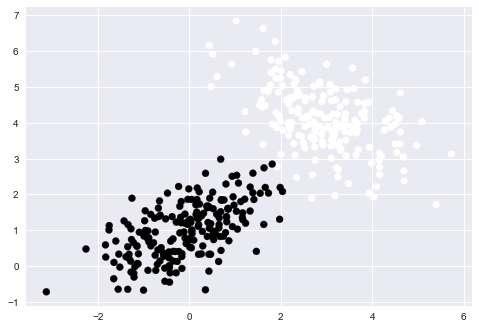

In [5]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

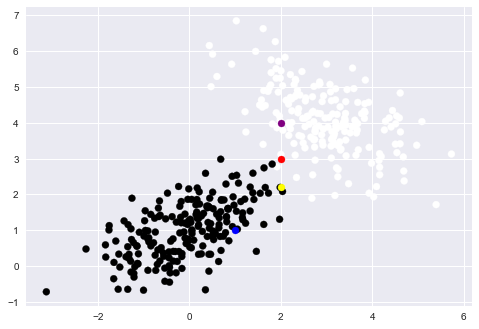

In [6]:
# generating query point and making predictions 
query_x1 = np.array([2,3])
query_x2 = np.array([1,1])
query_x3 = np.array([2,2.2])
query_x4 = np.array([2,4])
plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(query_x1[0],query_x1[1],color='red')
plt.scatter(query_x2[0],query_x2[1],color='blue')
plt.scatter(query_x3[0],query_x3[1],color='yellow')
plt.scatter(query_x4[0],query_x4[1],color='purple')
plt.show()

In [7]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

# Test Time 
def knn(X,Y,queryPoint,k=5):
    
    vals = []
    m = X.shape[0]
    
    for i in range(m):
        d = dist(queryPoint,X[i])
        vals.append((d,Y[i]))
        
    
    vals = sorted(vals)
    # Nearest/First K points
    vals = vals[:k]
    
    vals = np.array(vals)
    
    #print(vals)
    
    new_vals = np.unique(vals[:,1],return_counts=True)
    print(new_vals)
    
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    
    return pred
    
    
    

In [8]:
x1 = knn(X,Y,[2,3])
x2 = knn(X,Y,[1,1])
x3 = knn(X,Y,[4,3])
x4 = knn(X,Y,[2,4])
print(x1,x2,x3,x4)

(array([0., 1.]), array([3, 2], dtype=int64))
(array([1.]), array([5], dtype=int64))
(array([0.]), array([5], dtype=int64))
(array([0.]), array([5], dtype=int64))
0.0 1.0 0.0 0.0


In [10]:
from sklearn.metrics import confusion_matrix
import math
true_values=[1,1,0,0]
pred_values=[]
pred_values.append(x1)
pred_values.append(x2)
pred_values.append(x3)
pred_values.append(x4)
con_mat = confusion_matrix(true_values, pred_values, [0, 1])
total_accuracy = (con_mat[0, 0] + con_mat[1, 1]) / float(np.sum(con_mat))
class1_accuracy = (con_mat[0, 0] / float(np.sum(con_mat[0, :])))
class2_accuracy = (con_mat[1, 1] / float(np.sum(con_mat[1, :])))
print(con_mat)
print('Total accuracy: %.5f' % total_accuracy)
print('Class1 accuracy: %.5f' % class1_accuracy)
print('Class2 accuracy: %.5f' % class2_accuracy)
print('Geometric mean accuracy: %.5f' % math.sqrt((class1_accuracy * class2_accuracy)))

[[2 0]
 [1 1]]
Total accuracy: 0.75000
Class1 accuracy: 1.00000
Class2 accuracy: 0.50000
Geometric mean accuracy: 0.70711
